# Gruop members:
*   Alexander Sundvall
*   Lakshmi Sri Rupa Kurukuri

In [ ]:
# Data manipulation packeges
import numpy as np
import pandas as pd

# Classifier packages
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# Regressor packages
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Plotting packeges
import matplotlib.pyplot as plt
import seaborn as sb

# Evaluation packeges
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Task 1:


The first task is to read data in CGT.csv prepare it for use in training and testing the classifiers. This is done by selecting the relevant columns in the data and shuffling it before it is partitioned into training data and test data. This is done in order to ensure that both the training and test sets contain some data from all classes.

In [ ]:
# Read the CSV file
data = pd.read_csv('/content/CTG.csv',  skiprows=1)

# Select the relevant numerical columns
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV',
                 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros',
                 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Suffle the dataset
data_shuffled = data.sample(frac = 1.0, random_state = 0)

# Split into input part X and output part Y
X = data_shuffled.drop('NSP', axis = 1)

# Map the diagnosis code to a human-readable label
def to_label(y):
  return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)


Once the data had been partitioned, we evaluated a series of classifiers through cross validation in order to find the most accurate. This classifier will then be trained on the entire training set and evaluated using the test set. First a baseline accuracy was established by evaluating a dummy classifier, then the classifiers were evaluated, yielding the following accuarcy scores:
*   Dummy Classifier: 0.78
*   Decision Tree Classifier: 0.92
*   Random Forest Classifier: 0.93
*   Gradient Booster Classifier: 0.95
*   Perceptron: 0.83
*   Logistic Regresion: 0.89
*   Linear SVC: 0.89
*   MLP Classifier: 0.91

The code for the evaluation of these classifiers is shown in the following code section, along with a plot of each classifiers accuracy.

<ipython-input-4-5c086ffa4fde>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x = algorithms, y= accuracies_list, palette='viridis')


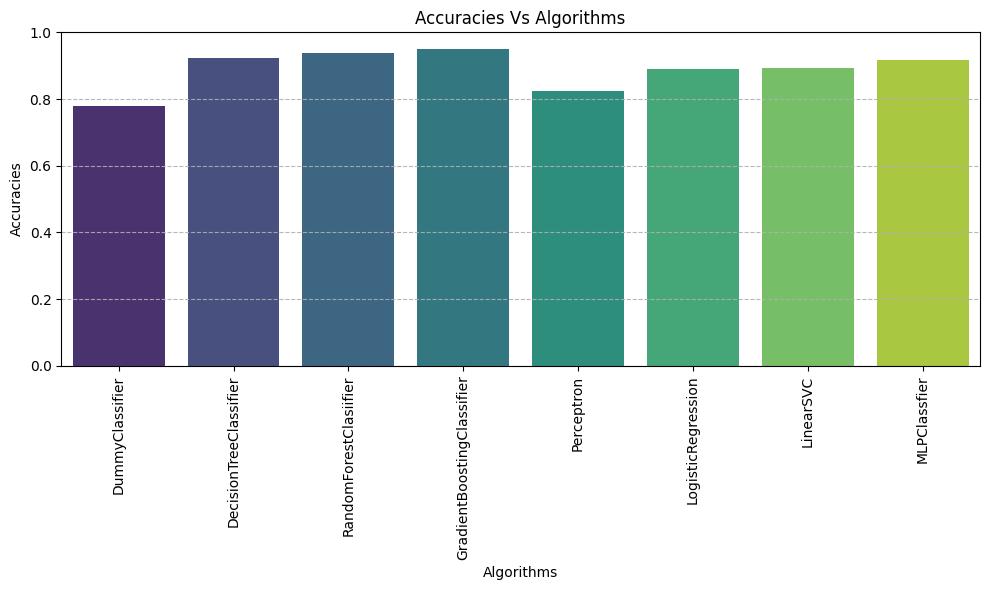

Most accurate algorithm: GradientBoostingClassifier
Algorithm accuracy: 0.9494117647058824
Dummy accuracy: 0.7805882352941176


In [ ]:
# Baseline using the dummy classifier
clf = DummyClassifier(strategy = 'most_frequent')
accuracies_Dummy_aggregated = np.mean(cross_val_score(clf, Xtrain, Ytrain))

# Perform a cross validation of each selected classifier

# Decision Tree Classifier
DTC = DecisionTreeClassifier()
accuracies_for_decisiontree_aggregated = np.mean(cross_val_score(DTC, Xtrain, Ytrain))

# Random Forest Classifier
RFC = RandomForestClassifier()
accuracies_for_RF_aggregated = np.mean(cross_val_score(RFC, Xtrain, Ytrain))

# Gradient Boosting Classifier
GBC = GradientBoostingClassifier()
accuracies_for_GB_aggregated = np.mean(cross_val_score(GBC, Xtrain, Ytrain))

# Perceptron
perceptron_model = Perceptron()
accuracies_for_perceptron_aggregated = np.mean(cross_val_score(perceptron_model,Xtrain,Ytrain))


# The data is rescaled in order to overcome convergence in the following classifiers
scaler= MinMaxScaler()
Xscaled = scaler.fit_transform(Xtrain)

# Logistic Regression
LR = LogisticRegression()
accuracies_for_LR_aggregated = np.mean(cross_val_score(LR, Xscaled, Ytrain))

# Linear SVC
LSVC = LinearSVC()
accuracies_for_LSVC_aggregated = np.mean(cross_val_score(LSVC, Xscaled, Ytrain))

# increased max_iter to 10000, set batch_size to 1000, and alpha to 0.001. This is done to overcome Convergence issues. Trail and erros based.
MLP = MLPClassifier(max_iter=10000, batch_size=1000,alpha=0.001)
accuracies_for_MLP_aggregated = np.mean(cross_val_score(MLP, Xscaled,Ytrain))

# Evaluate the results of each classifier
algorithms = ['DummyClassifier', 'DecisionTreeClassifier', 'RandomForestClasiifier',
              'GradientBoostingClassifier', 'Perceptron', 'LogisticRegression',
              'LinearSVC', 'MLPClassfier']
accuracies_list = [accuracies_Dummy_aggregated, accuracies_for_decisiontree_aggregated,
                   accuracies_for_RF_aggregated, accuracies_for_GB_aggregated,
                   accuracies_for_perceptron_aggregated, accuracies_for_LR_aggregated,
                   accuracies_for_LSVC_aggregated, accuracies_for_MLP_aggregated]


# Plot the accuracy of each algorithm

plt.figure(figsize=(10,6))
sb.barplot(x = algorithms, y= accuracies_list, palette='viridis')
plt.title('Accuracies Vs Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracies')
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.grid(axis='y',linestyle='--',alpha = 0.9)
plt.tight_layout()
plt.show()

# Most accurate algorithm
print("Most accurate algorithm: " + algorithms[accuracies_list.index(max(accuracies_list))])
print("Algorithm accuracy: " + str(max(accuracies_list)))
print("Dummy accuracy: " + str(accuracies_list[0]))

The evaluation of the classifers yielded the Gradiaent Boosting Classifier as both the most accurate among the evaluated classifiers, with an accuracy of 0.95, and better than the dummy baseline, which achieved an accurcy of 0.78.

This classifier is an ensemble method where each enseble member is a regression tree and the members are trained sequntially. At each iteration, the training data for the current tree is adjusted according to the negative gradient of the cost function of the previous tree. This is done in order to put greater emphasis on the data that was previously misslabled. The coplete classifier aggregates the outputs of each member in order to classify any input data.


This classifier is thus traind using the entire training set, after whoch it is evaluated on the test data. This evaluation yielded an accuracy score of 0.93, as can be seen in the section below.

In [ ]:
# Evaluate the accuracy of the classifier on the entire training set

clf = GradientBoostingClassifier()
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
print("Accuracy of the evaluated classifier:")
print(accuracy_score(Ytest, Yguess))


Accuracy of the evaluated classifier:
0.9295774647887324


# Task 2

This following section contains all predefined code given for this task.

In [ ]:
def plot_boundary(clf, X, Y, cmap='tab10', names=None):

    if isinstance(X, pd.DataFrame):
        if not names:
            names = list(X.columns)
        X = X.to_numpy()

    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()

    x_off = (x_max-x_min)/25
    y_off = (y_max-y_min)/25
    x_min -= x_off
    x_max += x_off
    y_min -= y_off
    y_max += y_off

    xs = np.linspace(x_min, x_max, 250)
    ys = np.linspace(y_min, y_max, 250)

    xx, yy = np.meshgrid(xs, ys)

    lenc = {c:i for i, c in enumerate(clf.classes_)}
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array([lenc[z] for z in Z])
    Z = Z.reshape(xx.shape)
    Yenc = [lenc[y] for y in Y]
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.15)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)

    sc = plt.scatter(X[:,0], X[:,1], c=Yenc, cmap=cmap, alpha=0.5, edgecolors='k', linewidths=0.5);

    plt.legend(handles=sc.legend_elements()[0], labels=list(clf.classes_))

    if names:
        plt.xlabel(names[0])
        plt.ylabel(names[1])


class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id

    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False


class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id


from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth

    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)
        self.root = self.make_tree(X, Y, self.max_depth)

    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph

    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)

    # This is the recursive training
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))

        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)

    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]

    # The following three methods need to be implemented by the classification and regression subclasses.

    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass


from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion

    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]

    # Checks whether a set of output values is homogeneous. In the classification case,
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1

    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]

            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point


def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high

def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)

def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

As before in the first task the data is read, shuffled and partitioned into training and testing data.

In [ ]:
# Read the CSV file
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/CTG.csv',  skiprows=1)

# Select the relevant numerical columns
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV',
                 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros',
                 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Suffle the dataset
data_shuffled = data.sample(frac = 1.0, random_state = 0)

# Split into input part X and output part Y
X = data_shuffled.drop('NSP', axis = 1)

# Map the diagnosis code to a human-readable label
def to_label(y):
  return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)


After performing the cross validation of the decision tree calssifier with a few select depths ranging from 1 to 50. We found that a max depth of 5 had the higest accuracy score among those that were investigate. There were some depths that had the same accuracy, but those were significantly higher which made overfitting a high likelyhood. Thus we settled on a max depth of 5 for the classifier, which when trained on the full training set and evaluated, yielded an accuracy score of 0.89. The below code section contains the evaluation of the classifier, as well as a drawing of a tree of depth 3 for illustrative purposes.

Classifier accuracy: 
0.8896713615023474


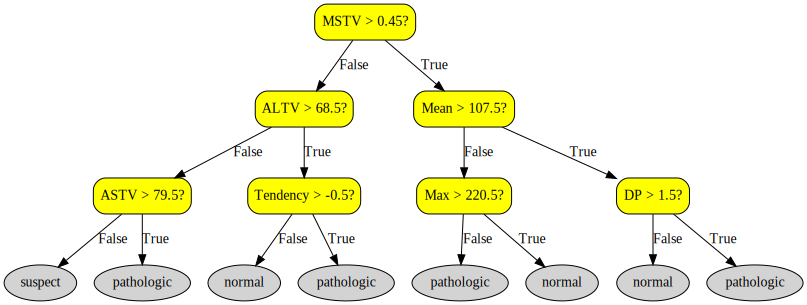

In [ ]:
# Train and evaluate the tree calssifier with a max depth of 5
clf = TreeClassifier(max_depth = 5)
clf.fit(Xtrain,Ytrain)
Yguess = clf.predict(Xtest)
print("Classifier accuracy: ")
print(accuracy_score(Ytest, Yguess))

# Tree classifier of depth 3, drawn for illustration
clf = TreeClassifier(max_depth = 3)
clf.fit(Xtrain,Ytrain)
clf.draw_tree()

The following figure illustrates the decision tree of the calssifier using a max depth of 3.

# Task 3

The blow code reads the data from sberbank.csv and selects the relevant columns, shuffles the data and partitions it into training and test datasets.

In [ ]:
# Read the CSV file using Pandas.
alldata = pd.read_csv('/content/sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

This data is npw used to evaluate a series of regressors in order ot find the one best suited to predict the price of an appartment. These regressors are evaluated based on the mean of the square errors returned by the cross validation. As in Task 1, a baseline is established using a dummy and then the remaining regressors are evaluated. The regressors that were evaluated, and thier mean square error, are the following:
*   Dummy: 0.39
*   Ridge: 0.30
*   Lasso: 0.30
*   Decision Tree: 0.52
*   Random Forest: 0.28
*   Gradient Boosting: 0.26
*   Linear: 0.30
*   MLP: 48.64

As can be seen in the results and in the plot bellow, the regressor with the lowest mean square error was the Gradient Boosting regressor. We thus chose to train this regressor on the entire training dataset and then evaluate it on the test data. This evaluation yielded a mean square error of 0.27.

The code for the cross validation of the different regressors and the final evaluation are located in the below code section, with the latter being at the end after the plot.


<ipython-input-29-c723bf15c581>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x = algorithms, y= accuracies_list, palette='viridis')


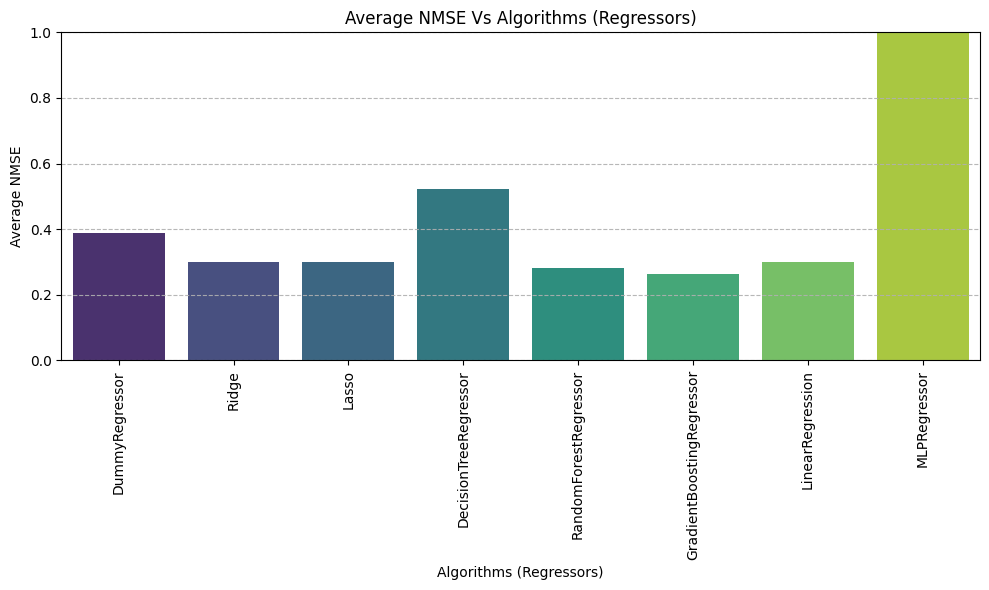

Mean square error of the evalauation of the selected regressor:
0.27137340480042965


In [ ]:
# Dummy regressor
m1 = DummyRegressor()
cv_results_Dummy = cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')
average_nmse_for_Dummy = -np.mean(cv_results_Dummy['test_score'])

# Ridge
for_Ridge = Ridge()
cv_results_Ridge = cross_validate(for_Ridge, Xtrain, Ytrain,scoring='neg_mean_squared_error')
average_nmse_for_Ridge= -np.mean(cv_results_Ridge['test_score'])

# Lasso
for_lasso = Lasso()
cv_results_Lasso = cross_validate(for_lasso, Xtrain, Ytrain,scoring='neg_mean_squared_error')
average_nmse_for_Lasso = -np.mean(cv_results_Lasso['test_score'])

# Decision Tree Regressor
for_DT = DecisionTreeRegressor()
cv_results_DT = cross_validate(for_DT, Xtrain, Ytrain,scoring='neg_mean_squared_error')
average_nmse_for_DT = -np.mean(cv_results_DT['test_score'])

# Random Forest Regressor
for_RF = RandomForestRegressor()
cv_results_RF = cross_validate(for_RF, Xtrain, Ytrain,scoring='neg_mean_squared_error')
average_nmse_for_RF = -np.mean(cv_results_RF['test_score'])

# Gradient Boosting Regressor
for_GB = GradientBoostingRegressor()
cv_results_GB = cross_validate(for_GB, Xtrain, Ytrain,scoring='neg_mean_squared_error')
average_nmse_for_GB = -np.mean(cv_results_GB['test_score'])

#Linear Regressor
for_LR= LinearRegression()
cv_results_LR= cross_validate(for_LR, Xtrain, Ytrain,scoring='neg_mean_squared_error')
average_nmse_for_LR= -np.mean(cv_results_LR['test_score'])

# MLP Regressor
for_MLP = MLPRegressor(max_iter=5000, hidden_layer_sizes=(100,), alpha=0.0001, learning_rate_init=0.1)
cv_results_MLP = cross_validate(for_MLP,Xtrain, Ytrain,scoring='neg_mean_squared_error')
average_nmse_for_MLP = -np.mean(cv_results_MLP['test_score'])


algorithms = ['DummyRegressor','Ridge','Lasso','DecisionTreeRegressor', 'RandomForestRegressor',
              'GradientBoostingRegressor','LinearRegression','MLPRegressor']
accuracies_list = [average_nmse_for_Dummy, average_nmse_for_Ridge, average_nmse_for_Lasso,
                   average_nmse_for_DT, average_nmse_for_RF, average_nmse_for_GB,
                   average_nmse_for_LR, average_nmse_for_MLP]

plt.figure(figsize=(10,6))
sb.barplot(x = algorithms, y= accuracies_list, palette='viridis')
plt.title('Average NMSE Vs Algorithms (Regressors)')
plt.xlabel('Algorithms (Regressors)')
plt.ylabel('Average NMSE')
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.grid(axis='y',linestyle='--',alpha = 0.9)
plt.tight_layout()
plt.show()

#for_MLP = MLPRegressor(max_iter=5000, hidden_layer_sizes=(100,), alpha=0.0001, learning_rate_init=0.1)
for_GB.fit(Xtrain, Ytrain)
print("Mean square error of the evalauation of the selected regressor:")
print(mean_squared_error(Ytest, for_GB.predict(Xtest)))

# Task 4

Part 1:

In the code section below is the written code for the class Treeregressor.

In [ ]:
import numpy as np
from sklearn.base import RegressorMixin

class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10, criterion='name'):
        super().__init__(max_depth)
        self.criterion = criterion

    def fit(self, X, Y):
        if self.criterion == 'name':
            self.criterion_function = partition_variance_sum # Define the scorer that measureres homgeneity
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    def get_default_value(self, Y):
        return np.mean(Y)

    def is_homogeneous(self, Y):
        return np.var(Y) <= 0.05

    def best_split(self, X, Y, feature):
        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])
        Y_sorted_squares = np.square(Y_sorted)

        n = len(Y)
        var_Y = np.var(Y)

        # Keep track of the best result we've seen so far.
        max_reduction = -np.inf
        max_i = None

        # Go through all positions, excluding the last
        for i in range(0, n-1):
            #low_partition = Y_sorted[0:i+1]
            #high_partition = Y_sorted[i+1:]
            #n_low = len(low_partition)
            #n_high = len(high_partition)
            #low_var = np.var(low_partition)
            #high_var= np.var(high_partition)
            #variance_reduction = var_Y - (self.criterion_function(n_low, low_var, n_high, high_var) / n)

            low_partition = Y_sorted[0:i+1]
            low_partition_squares = Y_sorted_squares[0:i+1]
            high_partition = Y_sorted[i+1:]
            high_partition_squares = Y_sorted_squares[i+1:]
            variance_reduction = var_Y - (self.criterion_function(i+1, low_partition, low_partition_squares, n-i-1, high_partition, high_partition_squares) / n)

            if variance_reduction > max_reduction:
                max_reduction = variance_reduction
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_reduction, feature, split_point


#def partition_variance_sum(n_L, var_L, n_H, var_H):
#    return n_H * var_H + n_L * var_L
def partition_variance_sum(n_low, low, low_squares, n_high, high, high_squares):
    var_low = np.sum(low_squares)/n_low - np.square(np.sum(low)/n_low)
    var_high = np.sum(high_squares)/n_high - np.square(np.sum(high)/n_high)
    return n_high * var_high + n_low * var_low

Part 2:

As a sanity check, the written regressor is evaluated on a small set of generated data, which creates two clear clusters of points. Since there is a clear divide between these points the expected depth of the tree would be one, with a leaf for each region. This is exactly the tree that is created, with the region boundry aligning visually with the plotted data points. Increasing the max depth of the tree does not result in any change to the tree since two regions is sufficien for classifiying the data.

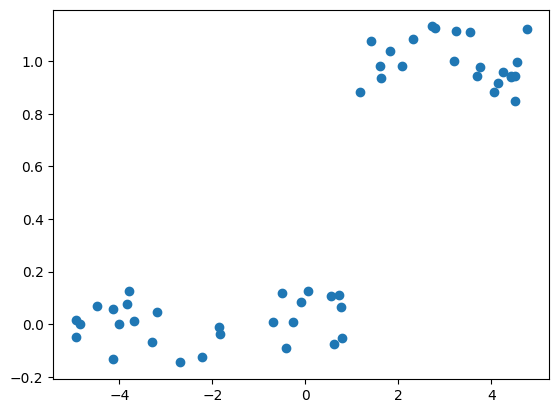

Mean square error of the evalauation of the selected regressor:
0.0055117798934903265


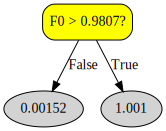

In [ ]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

import matplotlib.pyplot as plt
X, Y = make_some_data(50)
plt.scatter(X, Y)
plt.show()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

from sklearn.metrics import mean_squared_error
clf = TreeRegressor(max_depth = 3)
clf.fit(Xtrain,Ytrain)
Yguess = clf.predict(Xtest)
print("Mean square error of the evalauation of the selected regressor:")
print(mean_squared_error(Ytest, clf.predict(Xtest)))
clf.draw_tree()

Part 3:

In the code section below the regression tree is traind on the data containing the Russian apartment prices. For this we elected to train the tree using a maximum depth of 5. The evaluation of this tree yielded a mean squared error of 0.29. The tree is illustrated in a figure below.

In [ ]:
# Read the CSV file using Pandas.
alldata = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Mean square error of the evalauation of the selected regressor:
0.29028989917876596


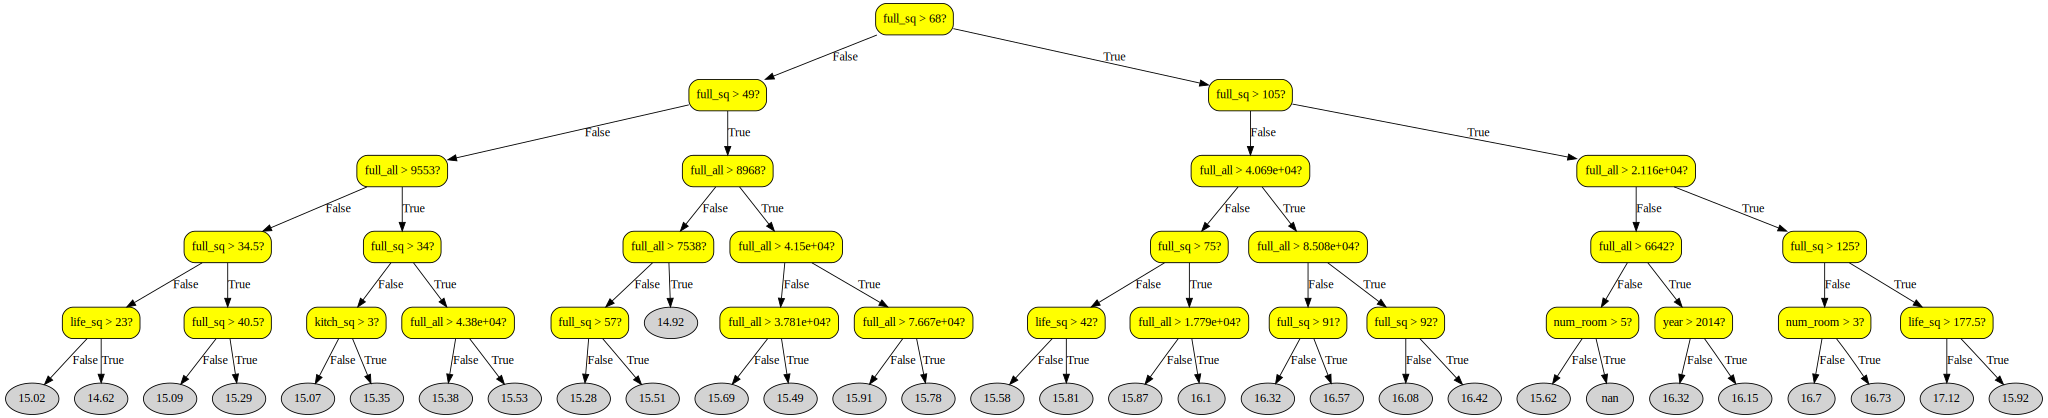

In [ ]:
clf = TreeRegressor(max_depth = 5)
clf.fit(Xtrain,Ytrain)
Yguess = clf.predict(Xtest)
print("Mean square error of the evalauation of the selected regressor:")
print(mean_squared_error(Ytest, Yguess))
clf.draw_tree()

Part 4:

In the section below the regressor is trained for different max depths, ranging from 0 to 12. The fit is then evaluated for both the training and test data in order to investigate under and over fitting. In the following section the mean square error of each evaluation is plotted against the corresponding depth. The evaluation was terminated due to the presense of NaN values in the predicted values of the output.

Due to time constraints the source of this could not be identified, but it is suspected to be a result of overfitting. This is because the *best_split()* function returns *None* if no split point was found, which is not possible if the input dataset to the function only contains one value. However, the effects of underfitting can be observed in the plot below where the first few depths results in a notably higher error due to the tree being too general in its classification of data.

In [ ]:
# Train the regressor at several tree depths and the evaluate it on both the
# training data and the test data at each depth.
train_eval = [0.0] * 13
test_eval = [0.0] * 13
for i in range(0,13):
    clf = TreeRegressor(max_depth = i)
    clf.fit(Xtrain,Ytrain)
    Yguess = clf.predict(Xtrain)
    test_eval[i] = mean_squared_error(Ytrain, Yguess)
    Yguess = clf.predict(Xtest)
    test_eval[i] = mean_squared_error(Ytest, Yguess)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div,

ValueError: Input contains NaN.

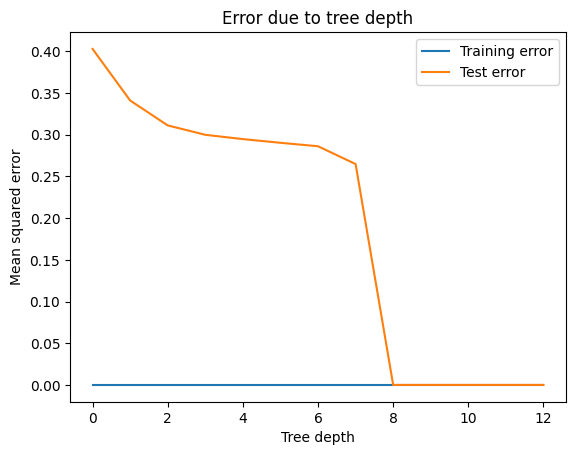

[0.4028398414133475, 0.34098250711388134, 0.3111296361669644]
[0.29986657721171217, 0.29472589628171303, 0.29028989917876596]
[0.2861452981779195, 0.26478889738739353, 0.0]
[0.0, 0.0, 0.0]
[0.0]


In [ ]:
plt.plot(range(0,13), train_eval, label ='Training error')
plt.plot(range(0,13), test_eval, label ='Test error')
plt.xlabel("Tree depth")
plt.ylabel("Mean squared error")
plt.legend()
plt.title('Error due to tree depth')
plt.show()

print(test_eval[0:3])
print(test_eval[3:6])
print(test_eval[6:9])
print(test_eval[9:12])
print(test_eval[12:])